In [1]:
import pandas as pd 
rway_img_df  = pd.read_csv("collection_images_download.csv")
# EXTRACT BRAND FROM IMAGE NAME
rway_img_df['brand'] = rway_img_df['image_name'].str.lower()
rway_img_df['brand'] = rway_img_df['brand'].str.split('couture').str[0]
rway_img_df['brand'] = rway_img_df['brand'].str.split('ready-to-wear').str[0]
rway_img_df['brand'] = rway_img_df['brand'].str.split('menswear').str[0]
rway_img_df['brand'] = rway_img_df['brand'].str.replace("-", " ")
rway_img_df['brand'] = rway_img_df['brand'].str.strip()

# subset rway_img_df where brand cointains versage,hermes
#brand_keywords = ['rick owens', 'louis vuitton', 'versace', 'giorgio armani', 'hermes', 'dries van noten', 'chanel']
brand_keywords = ['rick owens', 'dries van noten','versace', 'louis vuitton','chanel','giorgio armani']

data_df = rway_img_df[rway_img_df['brand'].isin(brand_keywords)]

# rename brand in target column
data_df['target'] = data_df['brand']
# factorized 'brand' using pandas
data_df['target'] = pd.factorize(data_df['target'])[0]


/var/folders/3c/t3n4ptk97wl0rt09z81znxsw0000gn/T/ipykernel_19967/592855495.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['target'] = data_df['brand']
/var/folders/3c/t3n4ptk97wl0rt09z81znxsw0000gn/T/ipykernel_19967/592855495.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['target'] = pd.factorize(data_df['target'])[0]


In [2]:
data_df['image_path_no_bkgnd'] = data_df['image_path'].astype(str)

# Execute 
# for each row in rway_img_df_small['image_path_no_bkgnd'] change the output path
for index, row in data_df.iterrows():
    # Split the image path into base name and extension
    base_name, extension = row['image_path_no_bkgnd'].split('.')

    # Add "-no-bkgnd" to the base name
    new_base_name = f"{base_name}-no-bkgnd"

    # Concatenate the new base name with the extension
    new_image_path = f"{new_base_name}.{extension}"

    # Replace the original image path with the new image path
    data_df.at[index, 'image_path_no_bkgnd'] = new_image_path


/var/folders/3c/t3n4ptk97wl0rt09z81znxsw0000gn/T/ipykernel_19967/644472005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['image_path_no_bkgnd'] = data_df['image_path'].astype(str)


In [3]:
# factorized 'brand' using pandas
data_df['target'] = pd.factorize(data_df['target'])[0]


/var/folders/3c/t3n4ptk97wl0rt09z81znxsw0000gn/T/ipykernel_19967/732787505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['target'] = pd.factorize(data_df['target'])[0]


# aVGG16 with self ttention

In [6]:
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Attention


# Split the data into training and validation sets
X_train_paths, X_val_paths, y_train, y_val = train_test_split(
    rway_img_df_small['image_path_no_bkgnd'],
    rway_img_df_small['target'],
    test_size=0.2,
    random_state=1234
)

# Define image dimensions (img_height and img_width) to resize the images during preprocessing.
img_height, img_width = 224, 224

# Map the brand labels in y_train and y_val to their corresponding integer labels using the brand_to_label dictionary.
brand_to_label = {brand: i for i, brand in enumerate(np.unique(rway_img_df_small['target']))}

# Map brand labels to integer labels
y_train = np.array([brand_to_label[brand] for brand in y_train])
y_val = np.array([brand_to_label[brand] for brand in y_val])

# Calculate the number of classes (num_classes) based on the unique labels.
num_classes = len(brand_to_label)

# Define the preprocess_image function to load, resize, and normalize the pixel values of the images.
def preprocess_image(image_path):
    image_path = './imgs/images/images/' + image_path  # Add the path prefix
    image = load_img(image_path, target_size=(img_height, img_width))
    image = img_to_array(image)
    image = image / 255.0  # Normalize
    return image

# Preprocess the images in X_train and X_val by applying the preprocess_image function to each image path.
X_train = np.array([preprocess_image(path) for path in X_train_paths])
X_val = np.array([preprocess_image(path) for path in X_val_paths])

# Convert the integer labels in y_train and y_val to one-hot encoded vectors using tf.keras.utils.to_categorical.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

# Create the custom simple_vgg16 model
input_shape = (img_height, img_width, 3)

# Load the VGG16 model with pretrained weights and without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the early layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Conv2D(128, (3, 3), activation='relu')(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_100_new2 = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x29a86f0b0>

# VGG16 with att

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Attention

# My custom simple_vgg16 
def simple_vgg16_attention(input_shape=(224, 224, 3), num_classes=10):
    input_layer = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    att_x = Attention()([x, x])  # Add Self-Attention layer here
    x = MaxPooling2D((2, 2))(att_x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Dense(256, activation='relu')(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    return model


print('model define')
   
# Load the image data and labels

# Split the data into training and validation sets
X_train_paths, X_val_paths, y_train, y_val = train_test_split(
    data_df['image_path_no_bkgnd'],
    data_df['target'],
    test_size=0.2,
    random_state=1234
)

# Define image dimensions (img_height and img_width) to resize the images during preprocessing.
img_height, img_width = 224, 224

# Map the brand labels in y_train and y_val to their corresponding integer labels using the brand_to_label dictionary.
brand_to_label = {brand: i for i, brand in enumerate(np.unique(data_df['target']))}

# Calculate the number of classes (num_classes) based on the unique labels.
num_classes = len(brand_to_label)

# Define the preprocess_image function to load, resize, and normalize the pixel values of the images.
def preprocess_image(image_path):
    image_path = './imgs/images/images/' + image_path  # Add the path prefix
    image = load_img(image_path, target_size=(img_height, img_width))
    image = img_to_array(image)
    image = image / 255.0  # Normalize
    return image

print('preprocess imge function defined' )
print('preprocess imge function initialized' )

# Preprocess the images in X_train and X_val by applying the preprocess_image function to each image path.
X_train = np.array([preprocess_image(path) for path in X_train_paths])
X_val = np.array([preprocess_image(path) for path in X_val_paths])

print('preprocess imge function completed' )

#Convert the integer labels in y_train and y_val to one-hot encoded vectors using tf.keras.utils.to_categorical.
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
#y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)



model define
preprocess imge function defined
preprocess imge function initialized
preprocess imge function completed


In [5]:
# Create the custom simple_vgg16 model
input_shape = (img_height, img_width, 3)
model = simple_vgg16_attention(input_shape=input_shape, num_classes=num_classes)

#Compile the model with an appropriate optimizer and loss function (e.g., 'adam' optimizer and 'categorical_crossentropy' loss)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('model initialized' )

#Train the model using the preprocessed data
history_100_new3 = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))


2023-08-24 21:01:30.996103: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-24 21:01:30.996154: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-24 21:01:30.996169: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-24 21:01:30.996562: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-24 21:01:30.996585: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


model initialized
Epoch 1/100


ValueError: in user code:

    File "/Users/elenaabcc/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/elenaabcc/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/elenaabcc/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/elenaabcc/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/elenaabcc/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/elenaabcc/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/elenaabcc/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/elenaabcc/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/elenaabcc/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/elenaabcc/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


# model evaluation

## Accuracy (Accuratezza): 
La percentuale di previsioni corrette rispetto al numero totale di campioni. Tuttavia, può essere fuorviante se le classi non sono bilanciate.

In [22]:

# Accuratezza durante la validazione
validation_accuracy = history_100_new3.history['val_accuracy']

# Calcola la media dell'accuratezza sulla validazione
average_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)

print("Media dell'accuratezza di validazione dopo 100 epoche:", average_validation_accuracy)

Media dell'accuratezza di validazione dopo 100 epoche: 0.5689970776438713


In [23]:
# Accuratezza durante l'addestramento
training_accuracy = history_100_new3.history['accuracy']


# Calcola la media dell'accuratezza sulla validazione
average_training_accuracy = sum(training_accuracy) / len(training_accuracy)

print("Media dell'accuratezza di training dopo 100 epoche:", average_training_accuracy)


Media dell'accuratezza di training dopo 100 epoche: 0.8674707894027233


## Area Under the Receiver Operating Characteristic Curve (AUC-ROC):

È una misura della capacità del modello di distinguere tra classi positive e negative. È utile quando il bilanciamento delle classi è diverso.

In [11]:
from sklearn.metrics import auc, precision_recall_curve
import matplotlib.pyplot as plt

# Calcola la curva precision-recall
precision, recall, _ = precision_recall_curve(y_val.ravel(), y_pred.ravel())

# Calcola l'AUC-PR
auc_pr = auc(recall, precision)

# Visualizza la curva precision-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='AUC-PR = %0.2f' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()


NameError: name 'y_pred' is not defined

## Matrice di Confusione: 
Questa è una rappresentazione tabellare delle previsioni del modello rispetto alle classi reali. Può aiutarti a capire quante previsioni sono corrette o errate per ciascuna classe.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)


2023-08-24 15:26:30.475622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 17s 486ms/step


In [18]:
confusion_mtx = confusion_matrix(np.argmax(y_val, axis=1), y_pred_classes)


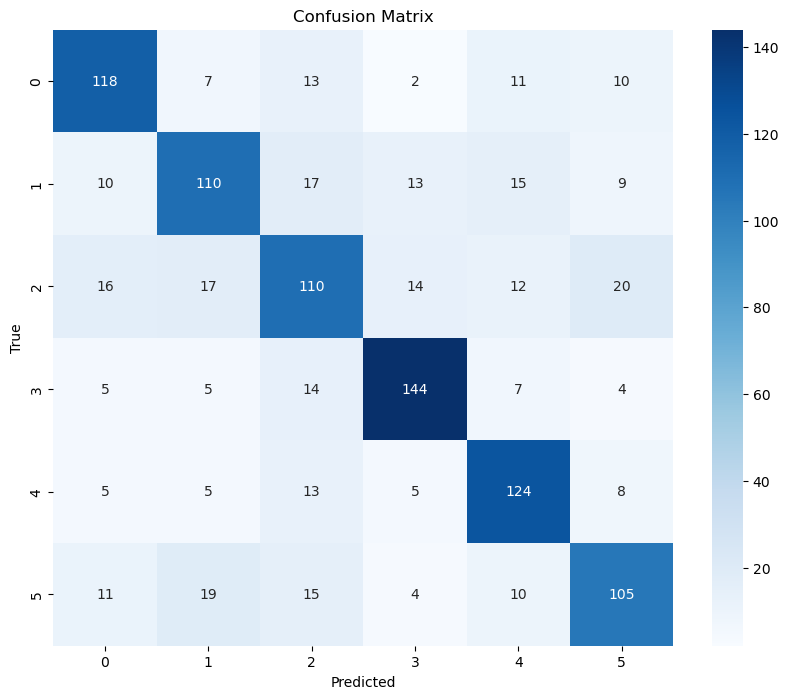

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=brand_to_label.keys(),
            yticklabels=brand_to_label.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Log Loss (Cross-Entropy Loss): 

È una misura della discrepanza tra le previsioni del modello e le etichette reali. È utile quando vuoi penalizzare le previsioni errate in modo più pesante.

In [41]:
from tensorflow.keras.losses import categorical_crossentropy

# Calcola la Log Loss sui dati di validazione
loss = categorical_crossentropy(y_val, y_pred)

# Calcola la media della Log Loss su tutti i campioni
average_loss = np.mean(loss)

print("Log Loss:", average_loss)


Log Loss: 0.8879764


## Validation and Train Accuracy

In [12]:
import json 
json.dump(history_100_new2.history, open('history_100_new4.json', 'w'))

In [13]:
import pandas as pd
history_100_new4 = pd.read_json('history_100_new4.json')

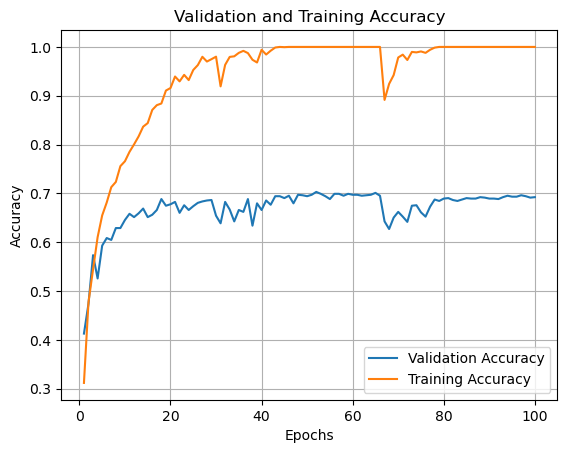

In [14]:
import matplotlib.pyplot as plt
val_accuracy = history_100_new4['val_accuracy']
accuracy = history_100_new4['accuracy']
epochs = range(1, len(val_accuracy) + 1)

# Plotta i risultati
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation and Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Validation and Train Loss

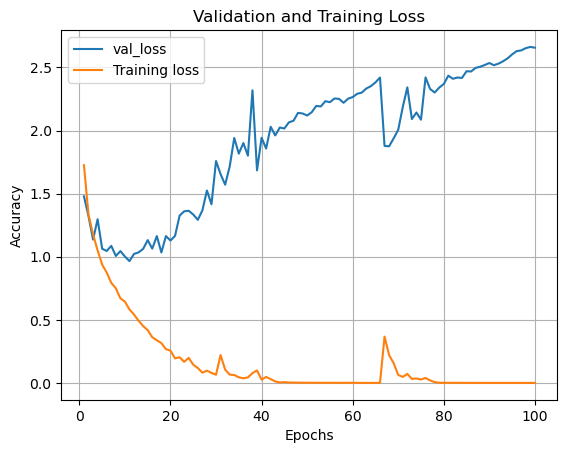

In [15]:
val_accuracy = history_100_new4['val_loss']
accuracy = history_100_new4['loss']
epochs = range(1, len(val_accuracy) + 1)

# Plotta i risultati
plt.plot(epochs, val_accuracy, label='val_loss')
plt.plot(epochs, accuracy, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation and Training Loss')
plt.legend()
plt.grid(True)
plt.show()


## F1-Score: 
L'armonica tra precision e recall. È utile quando vuoi bilanciare precision e recall e quando le classi non sono bilanciate.

In [16]:
from sklearn.metrics import f1_score

# Calcola la F1-Score per le previsioni e le etichette reali
f1score = f1_score(np.argmax(y_val, axis=1), y_pred_classes, average='weighted')

print("Weighted F1-Score:", f1score)


NameError: name 'y_pred_classes' is not defined

In [43]:
# Ottenere la lista dei nomi dei livelli del modello
layer_names = [layer.name for layer in model.layers]

# Stampa dei nomi dei livelli
for name in layer_names:
    print(name)

input_1
conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3
attention
max_pooling2d_3
conv2d_4
max_pooling2d_4
conv2d_5
max_pooling2d_5
conv2d_6
max_pooling2d_6
dense
flatten
dense_1
dropout
dense_2


# Viz At

1/1 [==============================] - 0s 143ms/step


2023-08-23 15:20:58.141420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


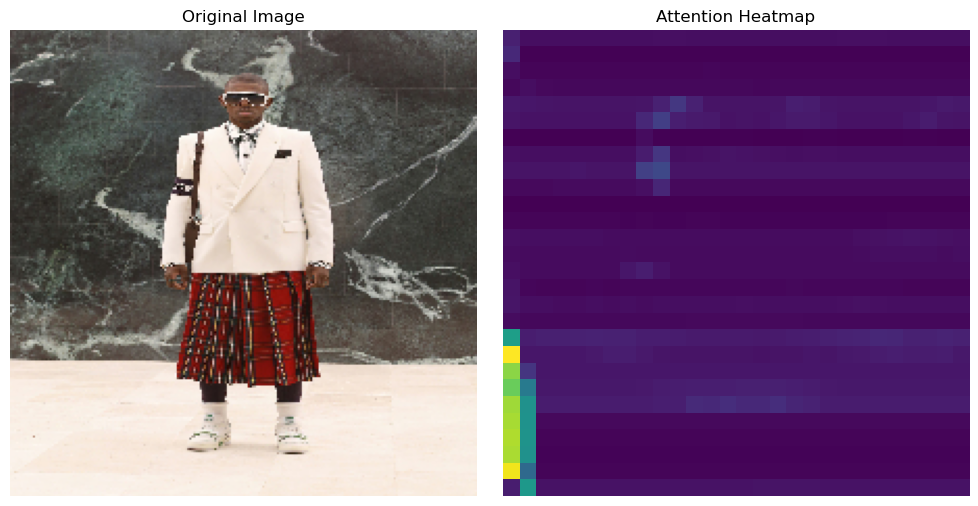

In [74]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.layers import Attention

# ... Rest of your code ...

# Convert X_val_paths to a numpy array
X_val_paths = np.array(X_val_paths)

# Choose an image index from your validation set
sample_image_index = 120 # Change this to your desired image index

# Get the image path using the chosen index
sample_image_path = X_val_paths[sample_image_index]

# Define a function to extract attention weights and generate heatmaps
def visualize_attention(model, img_path, layer_name):
    img = preprocess_image(img_path)
    img = np.expand_dims(img, axis=0)
    
    # Create a submodel that outputs attention weights
    submodel = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    attention_maps = submodel.predict(img)
    
    # Reshape attention maps for visualization
    attention_maps = np.squeeze(attention_maps)
    
    # Create a heatmap by summing along the channel axis
    heatmap = np.sum(attention_maps, axis=-1)
    
    # Normalize the heatmap
    heatmap /= np.max(heatmap)
    
    return heatmap

# Choose an image path from your validation set
#sample_image_path = X_val_paths[0]  # Change this to your desired image path

# Choose the layer name where the attention is applied (in your case, it's 'attention')
attention_layer_name = 'attention'


# Generate the attention heatmap for the chosen image and layer
heatmap = visualize_attention(model, sample_image_path, attention_layer_name)

# Display the original image and attention heatmap side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
original_image = load_img('./imgs/images/images/' + sample_image_path, target_size=(img_height, img_width))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Attention Heatmap
plt.subplot(1, 2, 2)
plt.imshow(heatmap, cmap='viridis')
plt.title('Attention Heatmap')
plt.axis('off')

plt.tight_layout()
plt.show()
